# Project 1

In [240]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

In [296]:
pd.set_option('display.precision', 3)

In [297]:
df = pd.read_csv(
    "https://projects.fivethirtyeight.com/polls/data/president_polls.csv",
    parse_dates=['start_date', 'end_date'],  
    index_col='start_date',  
    low_memory=False 
)
df.head()

C:\Users\erick\AppData\Local\Temp\ipykernel_28444\3522791745.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(
C:\Users\erick\AppData\Local\Temp\ipykernel_28444\3522791745.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,...,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,hypothetical,party,answer,candidate_id,candidate_name,pct
start_date,,,,,,,,,,,,,,,,,,,,,
2024-11-01,89289,1754,Patriot Polling,NaN,NaN,Patriot Polling,732,Patriot Polling,1.1,0.6,...,general,False,False,NaN,False,DEM,Harris,16661,Kamala Harris,49.4
2024-11-01,89289,1754,Patriot Polling,NaN,NaN,Patriot Polling,732,Patriot Polling,1.1,0.6,...,general,False,False,NaN,False,REP,Trump,16651,Donald Trump,48.1
2024-11-01,89290,1754,Patriot Polling,NaN,NaN,Patriot Polling,732,Patriot Polling,1.1,0.6,...,general,False,False,NaN,False,DEM,Harris,16661,Kamala Harris,48.7
2024-11-01,89290,1754,Patriot Polling,NaN,NaN,Patriot Polling,732,Patriot Polling,1.1,0.6,...,general,False,False,NaN,False,REP,Trump,16651,Donald Trump,49.6
2024-11-01,89291,1754,Patriot Polling,NaN,NaN,Patriot Polling,732,Patriot Polling,1.1,0.6,...,general,False,False,NaN,False,DEM,Harris,16661,Kamala Harris,49.2


In [298]:
df.info()

df.columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17747 entries, 2024-11-01 to 2021-04-03
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   poll_id                    17747 non-null  int64         
 1   pollster_id                17747 non-null  int64         
 2   pollster                   17747 non-null  object        
 3   sponsor_ids                8430 non-null   object        
 4   sponsors                   8430 non-null   object        
 5   display_name               17747 non-null  object        
 6   pollster_rating_id         17747 non-null  int64         
 7   pollster_rating_name       17747 non-null  object        
 8   numeric_grade              15687 non-null  float64       
 9   pollscore                  15701 non-null  float64       
 10  methodology                16655 non-null  object        
 11  transparency_score         14538 non-null  float64

Index(['poll_id', 'pollster_id', 'pollster', 'sponsor_ids', 'sponsors',
       'display_name', 'pollster_rating_id', 'pollster_rating_name',
       'numeric_grade', 'pollscore', 'methodology', 'transparency_score',
       'state', 'end_date', 'sponsor_candidate_id', 'sponsor_candidate',
       'sponsor_candidate_party', 'endorsed_candidate_id',
       'endorsed_candidate_name', 'endorsed_candidate_party', 'question_id',
       'sample_size', 'population', 'subpopulation', 'population_full',
       'tracking', 'created_at', 'notes', 'url', 'url_article', 'url_topline',
       'url_crosstab', 'source', 'internal', 'partisan', 'race_id', 'cycle',
       'office_type', 'seat_number', 'seat_name', 'election_date', 'stage',
       'nationwide_batch', 'ranked_choice_reallocated', 'ranked_choice_round',
       'hypothetical', 'party', 'answer', 'candidate_id', 'candidate_name',
       'pct'],
      dtype='object')

We will focus on two candidates, Kamala Harris and Donald Trump. Get subsets of data for these two candidates. What are the national polling averages for these two candidates since July 15, 2024? National polls are those that have null values in the 'state' column. What are the polling averages for each of the seven battle ground states: Arizona, Georgia, Michigan, Nevada, North Carolina, Pennsylvania, Wisconsin? What are the polling averages calculated from pollsters that are graded higher than or equal to 2 (the column name is 'numeric_grade')? 

### Cleaning the Data

In [299]:
#Too many useless columns so we are dropping them to create a cleaner and clearer data
clean_df = df.drop(['url', 'url_article', 'url_topline',
       'url_crosstab', 'source','notes','endorsed_candidate_id',
       'endorsed_candidate_name', 'endorsed_candidate_party','question_id',
        'ranked_choice_reallocated', 'ranked_choice_round','seat_number', 'seat_name','tracking', 'created_at',
       'hypothetical', 'election_date'], axis=1)

### Filtering data for relevant dates

In [300]:
start_date_filter = pd.to_datetime('07/15/2024') #defining that date that we want all the dates to be greater than

df1 = clean_df[clean_df.index >= start_date_filter] #creating the new df starting from july 15 2024

df1.head()

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,...,race_id,cycle,office_type,stage,nationwide_batch,party,answer,candidate_id,candidate_name,pct
start_date,,,,,,,,,,,,,,,,,,,,,
2024-11-01,89289,1754,Patriot Polling,NaN,NaN,Patriot Polling,732,Patriot Polling,1.1,0.6,...,8914,2024,U.S. President,general,False,DEM,Harris,16661,Kamala Harris,49.4
2024-11-01,89289,1754,Patriot Polling,NaN,NaN,Patriot Polling,732,Patriot Polling,1.1,0.6,...,8914,2024,U.S. President,general,False,REP,Trump,16651,Donald Trump,48.1
2024-11-01,89290,1754,Patriot Polling,NaN,NaN,Patriot Polling,732,Patriot Polling,1.1,0.6,...,8872,2024,U.S. President,general,False,DEM,Harris,16661,Kamala Harris,48.7
2024-11-01,89290,1754,Patriot Polling,NaN,NaN,Patriot Polling,732,Patriot Polling,1.1,0.6,...,8872,2024,U.S. President,general,False,REP,Trump,16651,Donald Trump,49.6
2024-11-01,89291,1754,Patriot Polling,NaN,NaN,Patriot Polling,732,Patriot Polling,1.1,0.6,...,8820,2024,U.S. President,general,False,DEM,Harris,16661,Kamala Harris,49.2


### National Polling Averages for Harris and Trump

In [301]:
#national polling average for kamala and trump since july 15 2024 
#national filter by .isnull state values

#Since national polls have null values in state column we are finding all the data that fits that description
national_polls = df1[df1['state'].isnull()] 

#grouping by the different candidates and finding the polling averages for each candidate
national_avg = national_polls.groupby('candidate_name')['pct'].mean() 

#filtering the polling averages for just Kamala Harris and Donald Trump
kamala_donald_avg = national_avg.loc[['Kamala Harris', 'Donald Trump']]

print('National Polling Averages for Presidential Candidates\n')
print(kamala_donald_avg)

National Polling Averages for Presidential Candidates

candidate_name
Kamala Harris    47.899
Donald Trump     45.761
Name: pct, dtype: float64


### Polling Averages for each of the Seven Battleground States

In [302]:
state_avg = df1.groupby('state')['pct'].mean()

battleground_avg = state_avg.loc[['Arizona', 'Georgia', 'Michigan', 'Nevada', 
                                  'North Carolina', 'Pennsylvania', 'Wisconsin']]
print('Polling Averages for Battleground States\n')
print(battleground_avg)

Polling Averages for Battleground States

state
Arizona           31.925
Georgia           30.408
Michigan          28.254
Nevada            32.361
North Carolina    30.113
Pennsylvania      32.390
Wisconsin         28.823
Name: pct, dtype: float64


### Polling Averages from Pollsters Graded Higher than or Equal to 2

In [303]:
num_grade2 = df1[df1['numeric_grade'] >= 2]

num_grade2.groupby('pollster')['pct'].mean()

#QUESTION is the 72 row data output correct or do we need to find one big avg

pollster
Angus Reid                                  41.364
AtlasIntel                                  32.061
Beacon/Shaw                                 30.924
CES / YouGov                                48.607
CNN/SSRS                                    21.718
                                             ...  
Washington Post/George Mason University     39.396
Winthrop U.                                 46.800
YouGov                                      28.373
YouGov Blue                                 15.667
YouGov/Center for Working Class Politics    45.750
Name: pct, Length: 73, dtype: float64

### 14-day rolling averages for Each Candidate

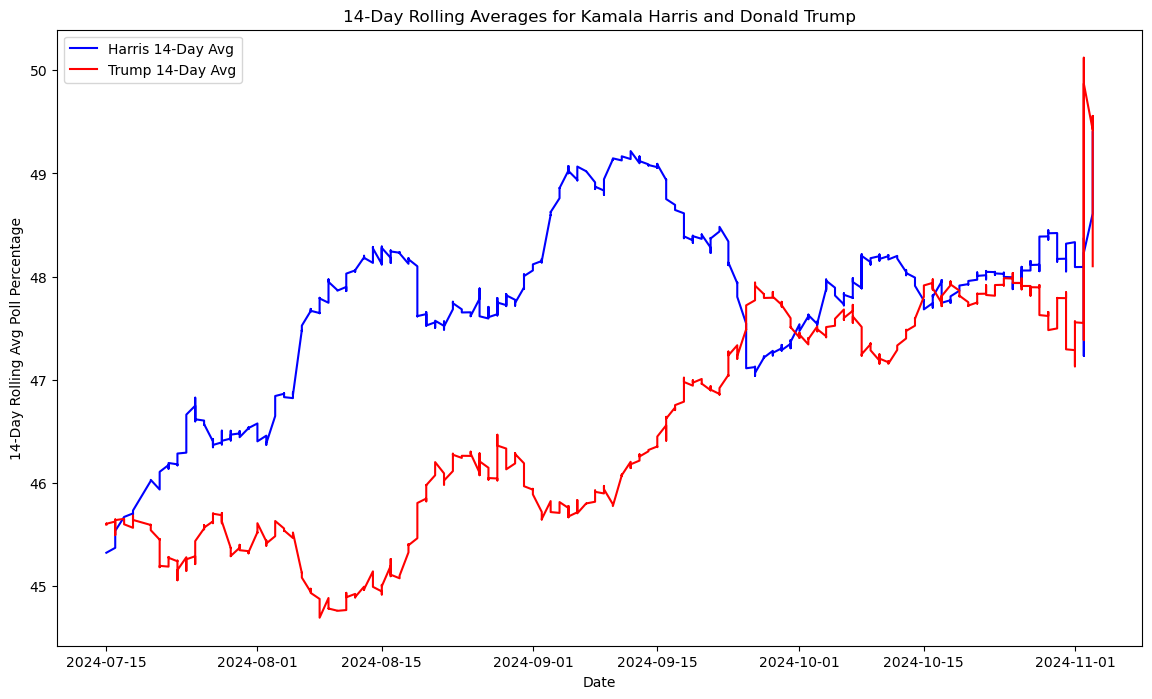

In [304]:
#Data for just Harris and Trump
harris_df = df1[df1['candidate_name'] == 'Kamala Harris']
trump_df = df1[df1['candidate_name'] == 'Donald Trump']

#getting the columns we want and setting the end_date as index so we can use the time based index
hdf = harris_df[['end_date', 'pct']].set_index('end_date')
tdf = trump_df[['end_date', 'pct']].set_index('end_date')

# getting the 14 day rolling avg using the 14day window bcs we have end_date as the index
hdf['Harris_14d_avg'] = hdf['pct'].rolling('14D', min_periods=1).mean()
tdf['Trump_14d_avg'] = tdf['pct'].rolling('14D', min_periods=1).mean()


plt.figure(figsize=(14, 8))
plt.plot(hdf.index, hdf['Harris_14d_avg'], color='blue', label='Harris 14-Day Avg')
plt.plot(tdf.index, tdf['Trump_14d_avg'], color='red', label='Trump 14-Day Avg')
plt.xlabel('Date')
plt.ylabel('14-Day Rolling Avg Poll Percentage')
plt.title('14-Day Rolling Averages for Kamala Harris and Donald Trump')
plt.legend()

plt.show()

### Individual Battleground State Rolling Averages for Candidates Donald Trump and Kamala Harris

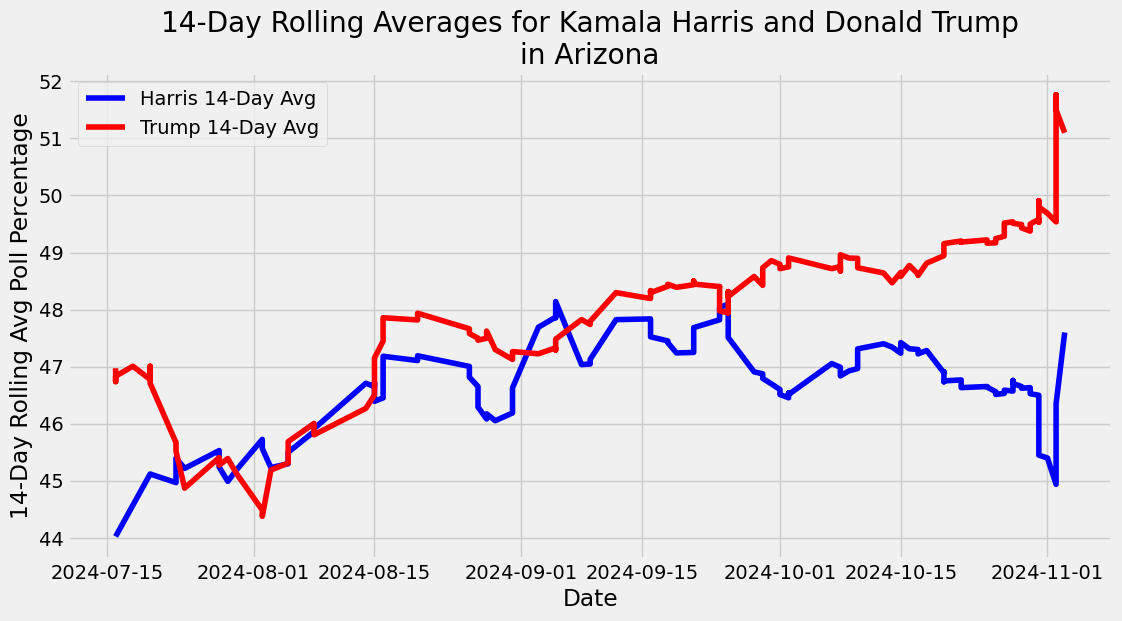

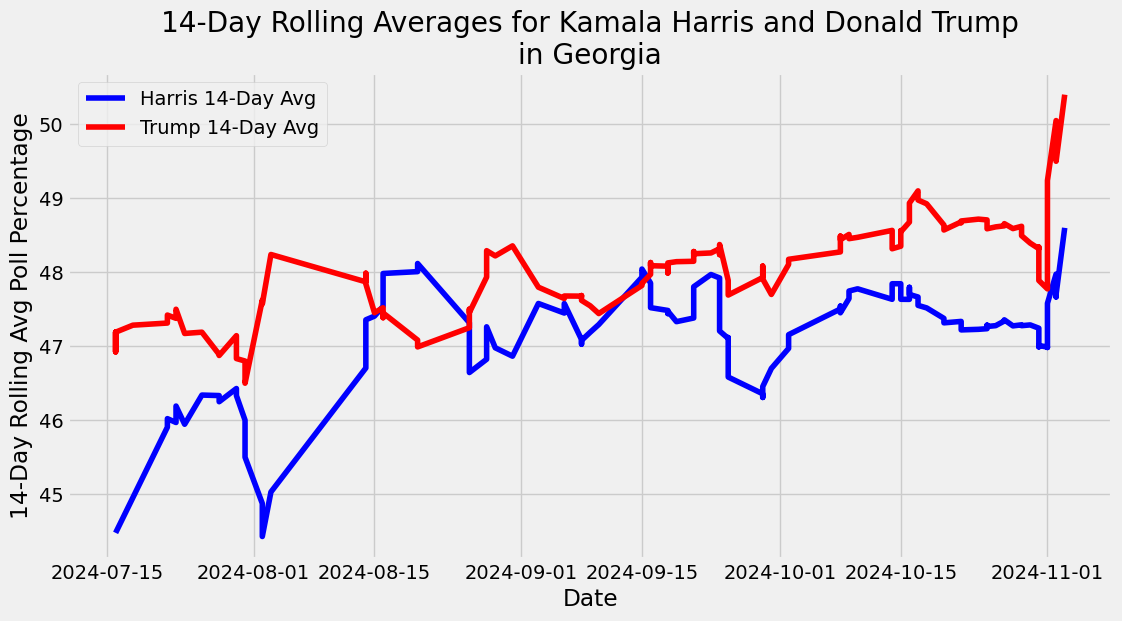

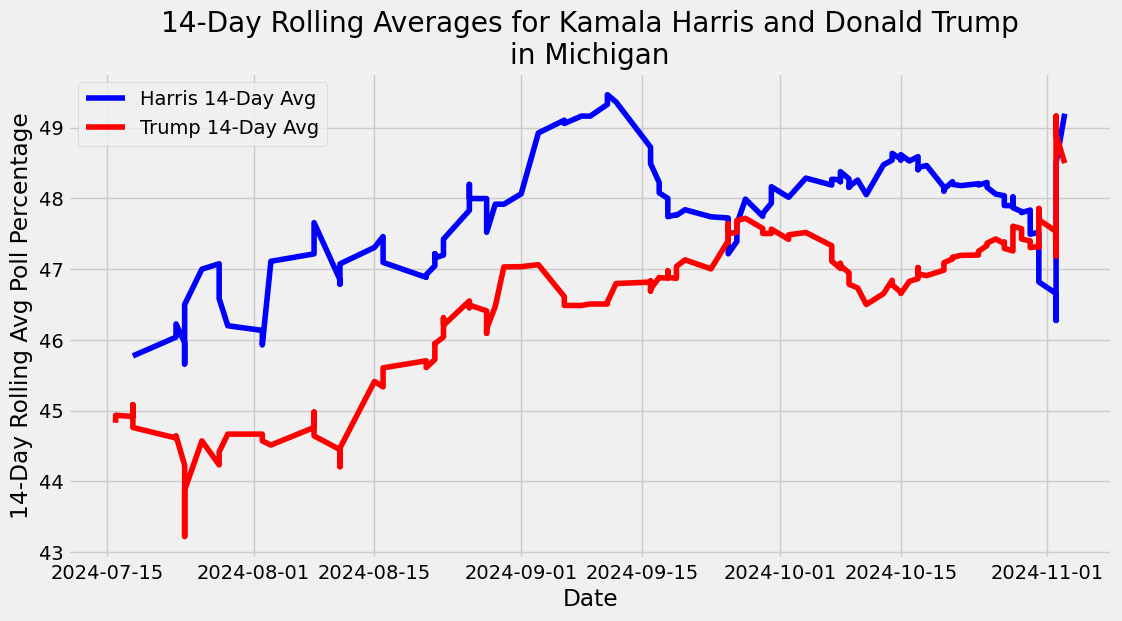

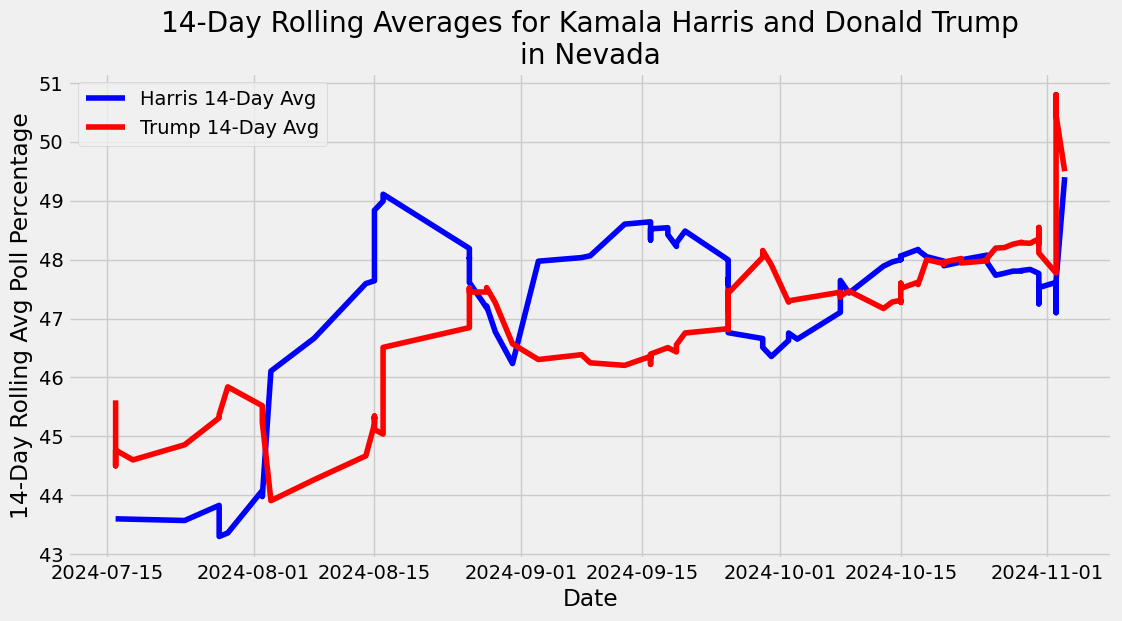

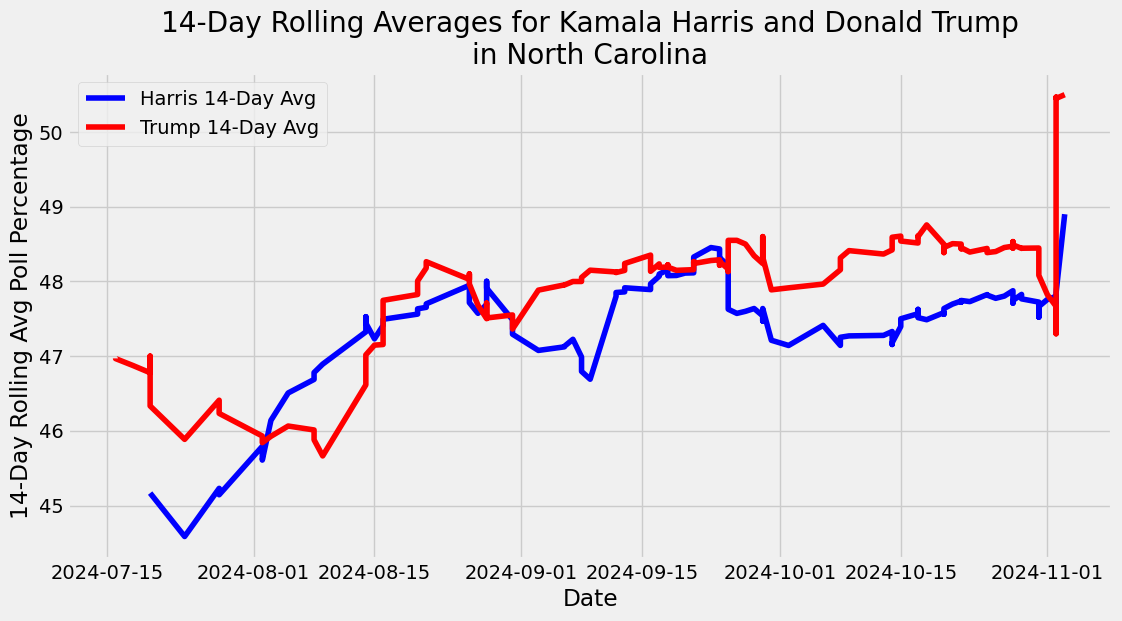

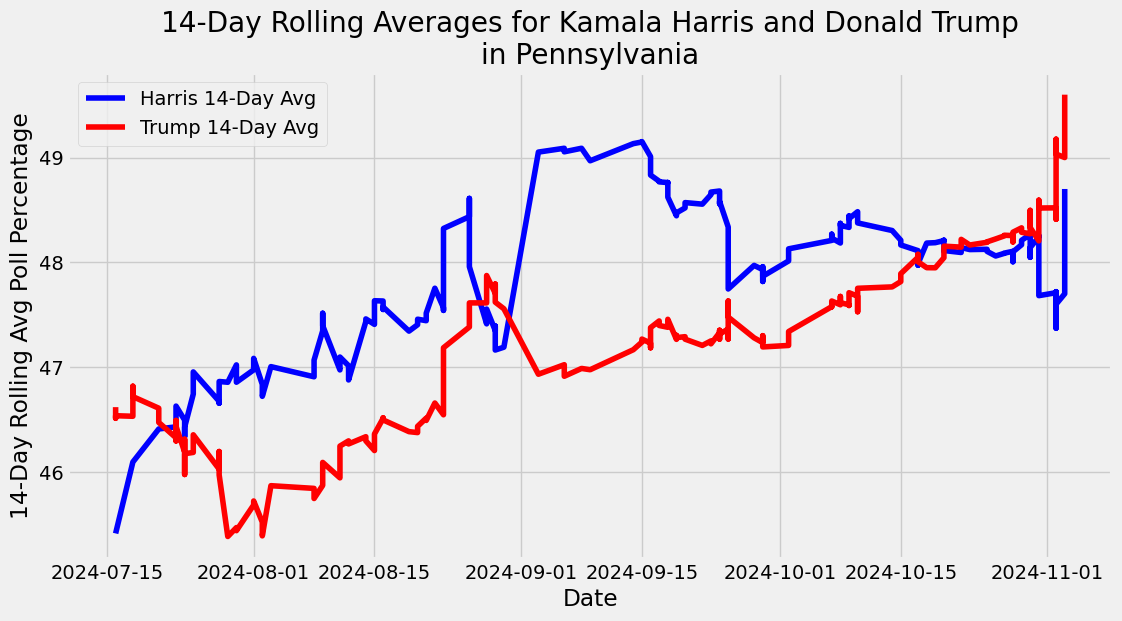

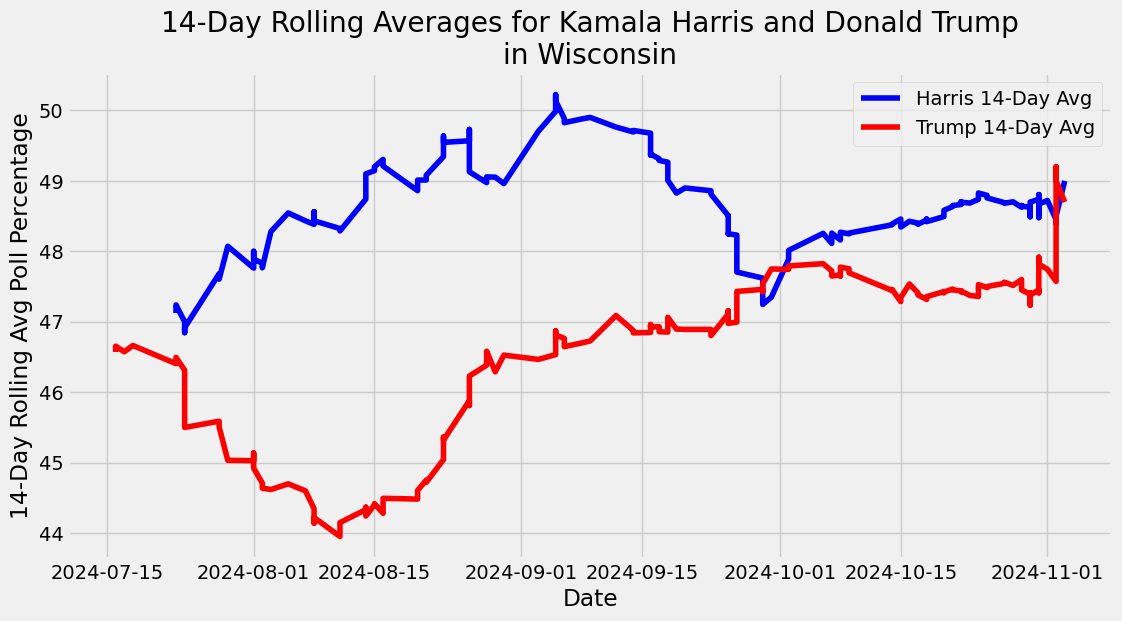

In [389]:
bg_states = ['Arizona', 'Georgia', 'Michigan', 'Nevada', 
                                  'North Carolina', 'Pennsylvania', 'Wisconsin']

#data for Harris and Trump along with bg state filter
harris_df = df1[(df1['candidate_name'] == 'Kamala Harris') & (df1['state'].isin(battleground_states))]
trump_df = df1[(df1['candidate_name'] == 'Donald Trump') & (df1['state'].isin(battleground_states))]


#loop in order to plot multiple graphs to show each candidate rolling average for each battleground state
for state in bg_states:
    
    #getting specifc state data, columns and setting index to use time based index
    hdf_state = harris_df[harris_df['state'] == state][['end_date', 'pct']].set_index('end_date')
    tdf_state = trump_df[trump_df['state'] == state][['end_date', 'pct']].set_index('end_date')
    
    #avgs
    hdf_state['Harris_14d_avg'] = hdf_state['pct'].rolling('14D', min_periods=1).mean()
    tdf_state['Trump_14d_avg'] = tdf_state['pct'].rolling('14D', min_periods=1).mean()

    #plotting for diff state in bg_states
    plt.figure(figsize=(12, 6))
    plt.plot(hdf_state.index, hdf_state['Harris_14d_avg'], color='blue', label='Harris 14-Day Avg')
    plt.plot(tdf_state.index, tdf_state['Trump_14d_avg'], color='red', label='Trump 14-Day Avg')

    plt.xlabel('Date')
    plt.ylabel('14-Day Rolling Avg Poll Percentage')
    plt.title(f'14-Day Rolling Averages for Kamala Harris and Donald Trump\nin {state}')
    plt.legend()

    plt.show()

### The 2020 election

In [251]:
#2020 election polling data
df2020 = pd.read_csv('https://projects.fivethirtyeight.com/polls/data/president_polls_historical.csv',
                parse_dates=['start_date', 'end_date'],  
                index_col='start_date',  
                low_memory=False 
                    )
df2020.head()

C:\Users\erick\AppData\Local\Temp\ipykernel_28444\1452419926.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2020 = pd.read_csv('https://projects.fivethirtyeight.com/polls/data/president_polls_historical.csv',
C:\Users\erick\AppData\Local\Temp\ipykernel_28444\1452419926.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2020 = pd.read_csv('https://projects.fivethirtyeight.com/polls/data/president_polls_historical.csv',


,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,...,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
start_date,,,,,,,,,,,,,,,,,,,,,
2020-10-31,73830,940,Lake Research,1587,National Women's Law Center,Lake Research Partners,165,Lake Research Partners,1.2,0.1,...,11/3/20,general,False,False,NaN,DEM,Biden,13256,Joe Biden,51.0
2020-10-31,73830,940,Lake Research,1587,National Women's Law Center,Lake Research Partners,165,Lake Research Partners,1.2,0.1,...,11/3/20,general,False,False,NaN,REP,Trump,13254,Donald Trump,48.0
2020-11-02,74946,1677,The Political Matrix/The Listener Group,NaN,NaN,The Political Matrix/The Listener Group,677,The Political Matrix/The Listener Group,0.7,0.7,...,11/3/20,general,False,False,NaN,DEM,Biden,13256,Joe Biden,44.2
2020-11-02,74946,1677,The Political Matrix/The Listener Group,NaN,NaN,The Political Matrix/The Listener Group,677,The Political Matrix/The Listener Group,0.7,0.7,...,11/3/20,general,False,False,NaN,REP,Trump,13254,Donald Trump,48.0
2020-11-01,72621,383,PPP,NaN,NaN,Public Policy Polling,263,Public Policy Polling,1.4,0.0,...,11/3/20,general,False,False,NaN,DEM,Biden,13256,Joe Biden,49.0


In [306]:
#actual vote shares data
p2020 = pd.read_csv('1976-2020-president.csv',parse_dates=['year'], index_col = 0)

p2020.index = p2020.index.year
p2020 = p2020.sort_index(ascending=False)

p2020.head(20) 

,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
year,,,,,,,,,,,,,,
2020,WYOMING,WY,56,83,68,US PRESIDENT,UNDERVOTES,NaN,False,1459,278503,20210113,NaN,OTHER
2020,ILLINOIS,IL,17,33,21,US PRESIDENT,"COLLINS, PHIL",INDEPENDENT,True,3,6033743,20210113,NaN,OTHER
2020,INDIANA,IN,18,32,22,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1729519,3033118,20210113,NaN,REPUBLICAN
2020,INDIANA,IN,18,32,22,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1242416,3033118,20210113,NaN,DEMOCRAT
2020,ILLINOIS,IL,17,33,21,US PRESIDENT,"SIMMONS, MARY RUTH CARO",NaN,True,1,6033743,20210113,NaN,OTHER
2020,ILLINOIS,IL,17,33,21,US PRESIDENT,"HIGGS, JEREMY",NaN,True,1,6033743,20210113,NaN,OTHER
2020,ILLINOIS,IL,17,33,21,US PRESIDENT,"ROUSE, DEBORAH",NaN,True,1,6033743,20210113,NaN,OTHER
2020,ILLINOIS,IL,17,33,21,US PRESIDENT,"STRUCK, JAMES TIMOTHY",NaN,True,2,6033743,20210113,NaN,OTHER
2020,ILLINOIS,IL,17,33,21,US PRESIDENT,"MCKEE, KEVIN",NaN,True,4,6033743,20210113,NaN,OTHER


In [269]:
#cleaning data frame
cdf2020 = df2020.drop(['url', 'source','notes','endorsed_candidate_id',
       'endorsed_candidate_name', 'endorsed_candidate_party','question_id',
        'ranked_choice_reallocated', 'ranked_choice_round','seat_number', 'seat_name','tracking', 'created_at',
        'election_date'], axis=1)

### Calculating Actual Vote Shares

In [339]:
#divide candidate votes by totalvotes for joe biden and trump 
#store data in new columns 

#creating new dfs to store individual candidate data
bidendf = p2020[p2020['candidate'] == 'BIDEN, JOSEPH R. JR']

trumpdf = p2020[p2020['candidate'] == 'TRUMP, DONALD J.']

#tried doing it without loc but I kept getting an error bcs of alignment issue but .loc helped with it
p2020.loc[p2020['candidate'] == 'BIDEN, JOSEPH R. JR', 'biden_actual_share'] = bidendf['candidatevotes'] / bidendf['totalvotes']
p2020.loc[p2020['candidate'] == 'TRUMP, DONALD J.', 'trump_actual_share'] = trumpdf['candidatevotes'] / trumpdf['totalvotes']

# .isin when filtering for multiple values
p2020real = p2020[p2020['candidate'].isin(['BIDEN, JOSEPH R. JR', 'TRUMP, DONALD J.'])]

p2020real.head()

,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,biden_actual_share,trump_actual_share
year,,,,,,,,,,,,,,,,
2020,INDIANA,IN,18,32,22,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1729519,3033118,20210113,NaN,REPUBLICAN,NaN,0.570
2020,INDIANA,IN,18,32,22,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1242416,3033118,20210113,NaN,DEMOCRAT,0.410,NaN
2020,IOWA,IA,19,42,31,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,897672,1700130,20210113,NaN,REPUBLICAN,NaN,0.528
2020,IOWA,IA,19,42,31,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,759061,1700130,20210113,NaN,DEMOCRAT,0.446,NaN
2020,GEORGIA,GA,13,58,44,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,2473633,4999960,20210113,NaN,DEMOCRAT,0.495,NaN


### Merging Actual Vote Data and Polling Data

Plan: Merge dfs by state 

Have to convert state values to upper() in order to be able to match the columns

We want the actual shares, polling pcts, pollsters, and states

In [366]:
#merge dfs according to lect 15

#creating filtered dfs to merge them more cleanly
df2020['state'] = df2020['state'].str.upper()

#getting values for only Donald Trump in the two dfs bcs thats the data we want
df2020merge = df2020[df2020['candidate_name'] == 'Donald Trump'][['state', 'pollster', 'pct']].dropna()
p2020merge = p2020real[p2020real['candidate'] == 'TRUMP, DONALD J.'][['state', 'candidatevotes', 'totalvotes', 'trump_actual_share']]

#merging the dfs by the state column
mergedf = pd.merge(df2020merge, p2020merge)

mergedf = mergedf.set_index(['state', 'pollster'])

#now we have a good data set to work with in computing the forecast error
mergedf.head(20)

pct  candidatevotes  \
state   pollster                                                        
FLORIDA The Political Matrix/The Listener Group  48.0         5668731   
        The Political Matrix/The Listener Group  48.0         4617886   
        InsiderAdvantage                         48.2         5668731   
        InsiderAdvantage                         48.2         4617886   
        Trafalgar Group                          49.4         5668731   
        Trafalgar Group                          49.4         4617886   
        Swayable                                 45.5         5668731   
        Swayable                                 45.5         4617886   
        SurveyMonkey                             48.0         5668731   
        SurveyMonkey                             48.0         4617886   
        SurveyMonkey                             49.0         5668731   
        SurveyMonkey                             49.0         4617886   
        aytm.com                                 43.0         5668731   
        aytm.com                                 43.0         4617886   
        Susquehanna                              47.0         5668731   
        Susquehanna                              47.0         4617886   
        Change Research                          48.0         5668731   
        Change Research                          48.0         4617886   
        Quinnipiac                               42.0         5668731   
        Quinnipiac                               42.0         4617886   

                                                 totalvotes  \
state   pollster                                              
FLORIDA The Political Matrix/The Listener Group    11067456   
        The Political Matrix/The Listener Group     9420039   
        InsiderAdvantage                           11067456   
        InsiderAdvantage                            9420039   
        Trafalgar Group                            11067456   
        Trafalgar Group                             9420039   
        Swayable                                   11067456   
        Swayable                                    9420039   
        SurveyMonkey                               11067456   
        SurveyMonkey                                9420039   
        SurveyMonkey                               11067456   
        SurveyMonkey                                9420039   
        aytm.com                                   11067456   
        aytm.com                                    9420039   
        Susquehanna                                11067456   
        Susquehanna                                 9420039   
        Change Research                            11067456   
        Change Research                             9420039   
        Quinnipiac                                 11067456   
        Quinnipiac                                  9420039   

                                                 trump_actual_share  
state   pollster                                                     
FLORIDA The Political Matrix/The Listener Group               0.512  
        The Political Matrix/The Listener Group               0.490  
        InsiderAdvantage                                      0.512  
        InsiderAdvantage                                      0.490  
        Trafalgar Group                                       0.512  
        Trafalgar Group                                       0.490  
        Swayable                                              0.512  
        Swayable                                              0.490  
        SurveyMonkey                                          0.512  
        SurveyMonkey                                          0.490  
        SurveyMonkey                                          0.512  
        SurveyMonkey                                          0.490  
        aytm.com                                              0.512  
      

### Computing Forecast Errors for Trump by all Pollsters

Plan:

we are going to add up all the candidate votes for each state and then total votes by state and divided total state candidate votes by total state total votes to get `actual share by state`

Once we have this we can aggregate the pollster pcts in df2020 by state using groupby 

Every `actual vote share by state` will be subtracted from every `poll pct by state` for each pollster. 
So all of the florida pollsters will be subtracted by the actual vote share for florida 

At the end of this we will compare which pollsters have the lowest forecast error

In [382]:
#forecast error = actual vote share (in p2020) - poll pct (in df2020)


#grouping the mergeddf by state in order to calculate the total candidate votes and total votes by state
state_votes = mergedf.groupby('state').agg({
    'candidatevotes': 'sum', 
    'totalvotes': 'sum'       
}).reset_index()

#rewriting the actual share values with the values by state
state_votes['trump_actual_share'] = state_votes['candidatevotes'] / state_votes['totalvotes']
merged_df = pd.merge(df2020merge, state_votes[['state', 'trump_actual_share']], on='state')

#calculating the forecast error for the dfs by subtracting actual shares by poll pcts
merged_df['forecast_error'] = merged_df['trump_actual_share'] - (merged_df['pct'] / 100)  #pct is in percent so divide by 100

#setting the indexes back
merged_df = merged_df.set_index(['state', 'pollster'])

merged_df

pct  trump_actual_share  \
state   pollster                                                            
FLORIDA The Political Matrix/The Listener Group  48.0               0.502   
        InsiderAdvantage                         48.2               0.502   
        Trafalgar Group                          49.4               0.502   
        Swayable                                 45.5               0.502   
        SurveyMonkey                             48.0               0.502   
...                                               ...                 ...   
ALASKA  Zogby                                    45.0               0.521   
        Zogby                                    45.0               0.521   
        Zogby                                    48.0               0.521   
        Zogby                                    48.0               0.521   
        Zogby                                    45.0               0.521   

                                                 forecast_error  
state   pollster                                                 
FLORIDA The Political Matrix/The Listener Group           0.022  
        InsiderAdvantage                                  0.020  
        Trafalgar Group                                   0.008  
        Swayable                                          0.047  
        SurveyMonkey                                      0.022  
...                                                         ...  
ALASKA  Zogby                                             0.071  
        Zogby                                             0.071  
        Zogby                                             0.041  
        Zogby                                             0.041  
        Zogby                                             0.071  

[5285 rows x 3 columns]

### Means, Standard Deviations, and Distribution of the Forecast Errors

Mean Forecast Error: 0.0293
Standard Deviation of Forecast Error: 0.0368


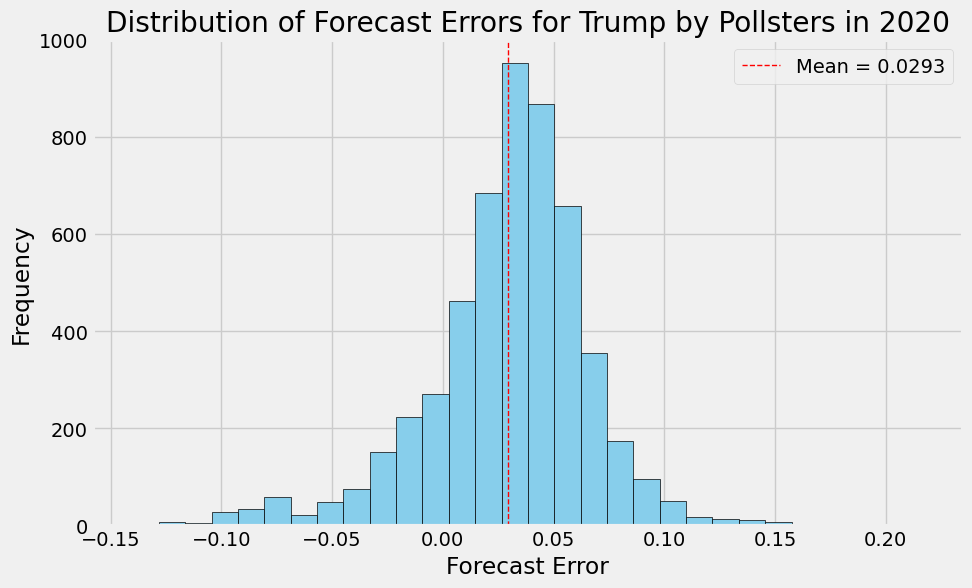

Top 10 Pollsters with Smallest Forecast Errors:

pollster
Atlantic Media and Research           0.001
U. New Orleans                        0.005
Basswood Research                     0.008
DHM Research                          0.008
Victory Research                      0.008
Wick                                  0.008
Frederick Polls LLC                   0.009
Fabrizio                              0.011
PPIC                                  0.011
Crosswind Media & Public Relations    0.011
Name: abs_forecast_error, dtype: float64


In [405]:
plt.style.use('fivethirtyeight')

#getting the means and stds for the data
fe_mean = merged_df['forecast_error'].mean()
fe_std = merged_df['forecast_error'].std()
print(f"Mean Forecast Error: {fe_mean:.4f}")
print(f"Standard Deviation of Forecast Error: {fe_std:.4f}")

#plotting the histogram for the data
plt.figure(figsize=(10, 6))
plt.hist(merged_df['forecast_error'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Forecast Error')
plt.ylabel('Frequency')
plt.title('Distribution of Forecast Errors for Trump by Pollsters in 2020')
plt.axvline(fe_mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {fe_mean:.4f}') #getting the mean val on label
plt.legend()
plt.show()

#getting abs forecast error mean
merged_df['abs_forecast_error'] = merged_df['forecast_error'].abs()
pollster_performance = merged_df.groupby('pollster')['abs_forecast_error'].mean()

#sorting by smallest averages and getting the top 10 pollsters
top_10_pollsters = pollster_performance.nsmallest(10)
print("Top 10 Pollsters with Smallest Forecast Errors:\n")
print(top_10_pollsters)


### What does this tell us about the 2020 polls?

This tells us that generally the pollsters did well in terms of accuracy. The low standard deviation tells us that there was not a huge dispersion in forecast errors. The histogram helps us visualize the extent of that dispersion with many polls sitting around the mean of a 2.93% forecast error.

#### Smallest Forecast Error using Absolute Values and Mean

No data for pollster: Atlantic Media and Research
No data for pollster: U. New Orleans
No data for pollster: Basswood Research
No data for pollster: DHM Research
No data for pollster: Victory Research


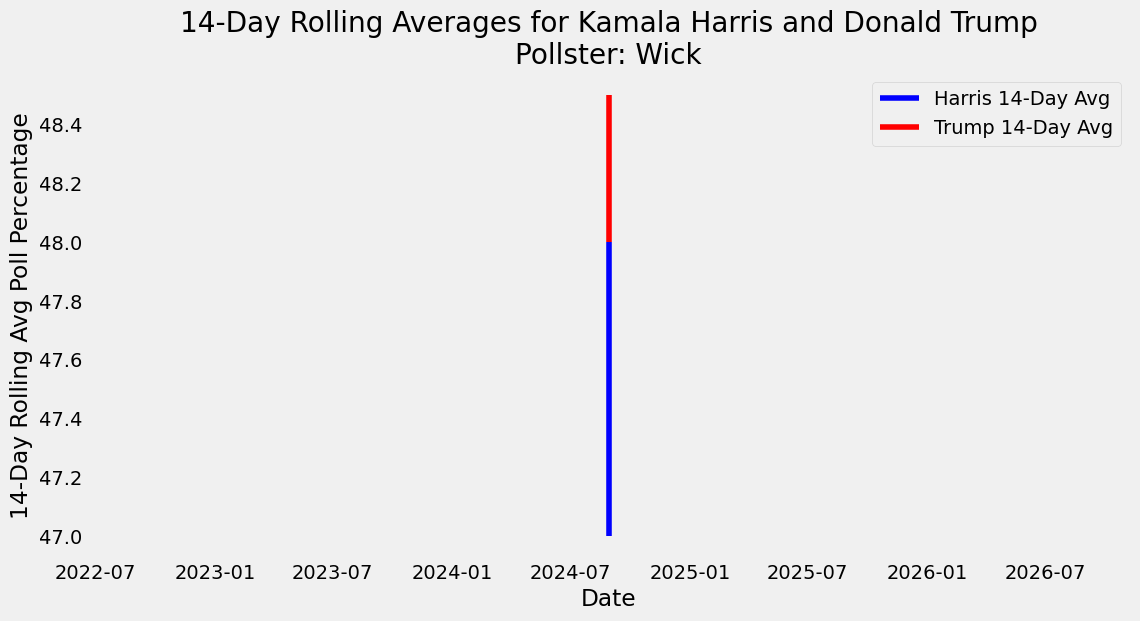

No data for pollster: Frederick Polls LLC


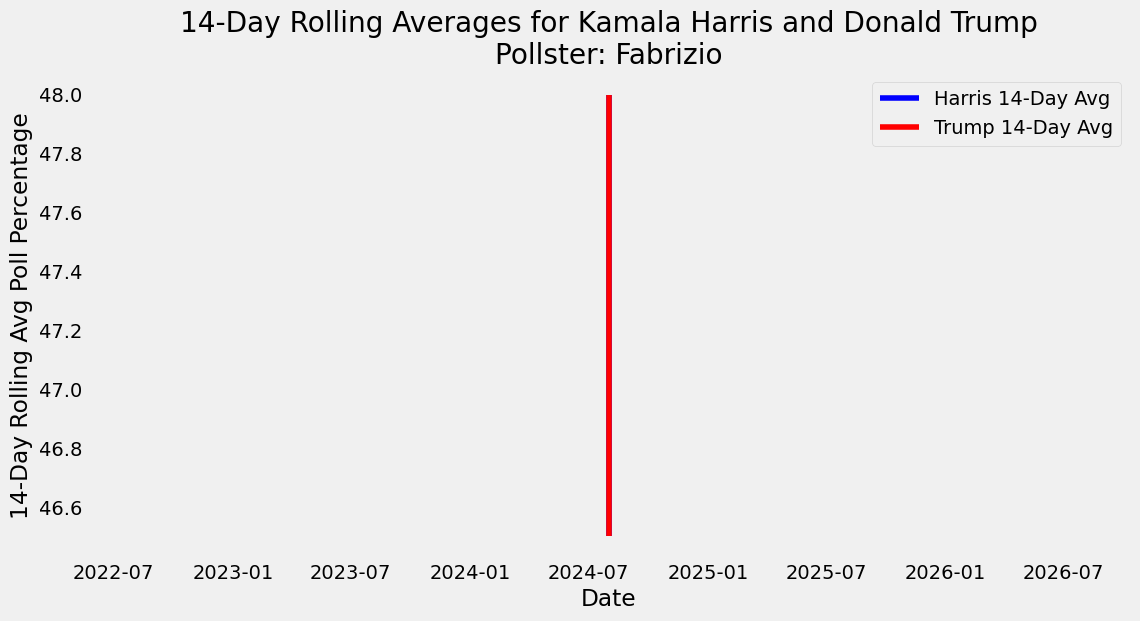

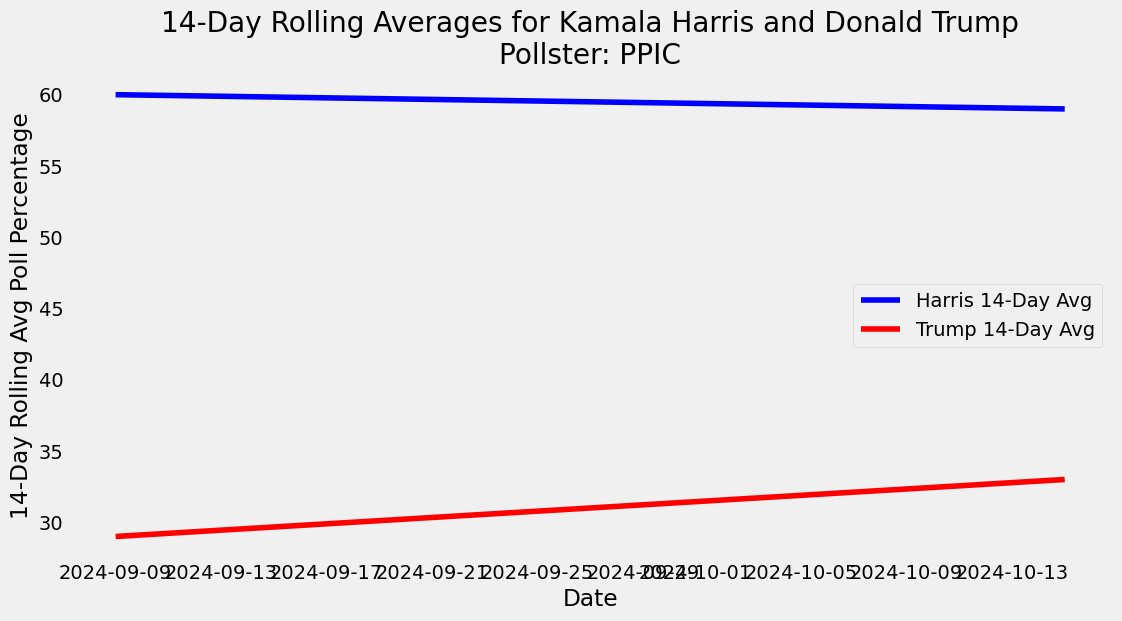

No data for pollster: Crosswind Media & Public Relations
No data for pollster: Zia Poll
No data for pollster: Florida Atlantic University


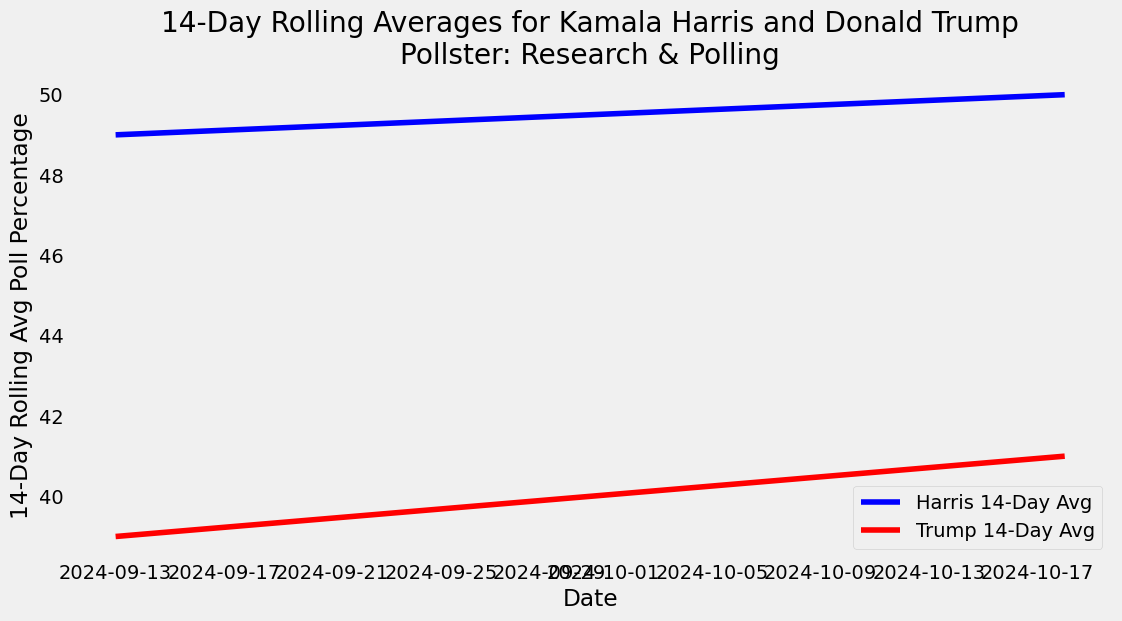

No data for pollster: Cardinal Point Analytics (CardinalGPS)


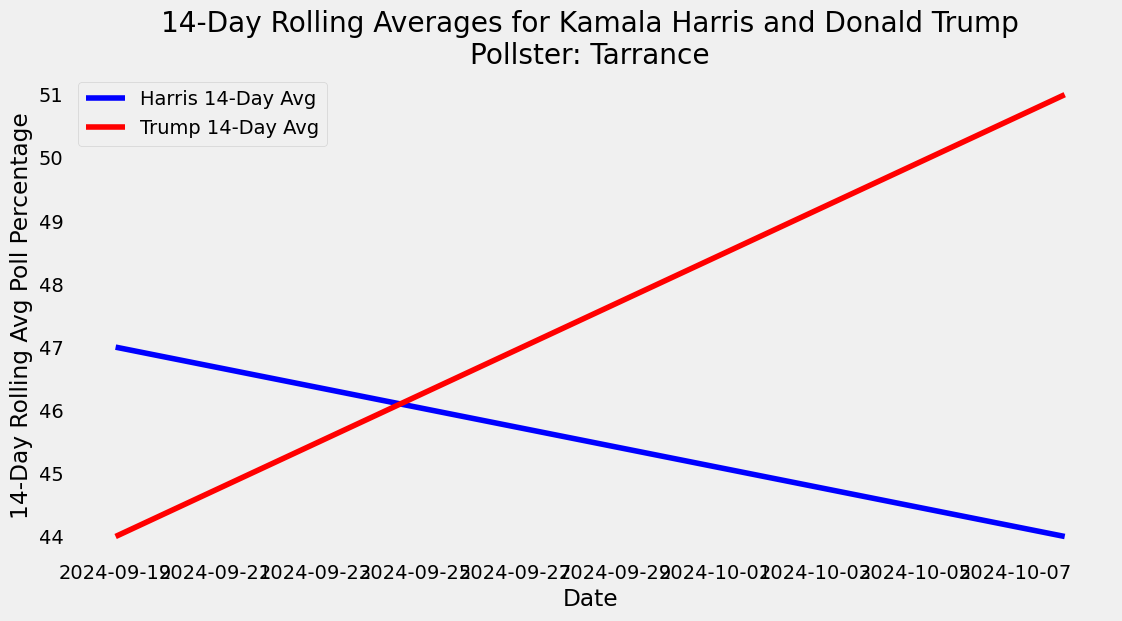

No data for pollster: Texas Lyceum


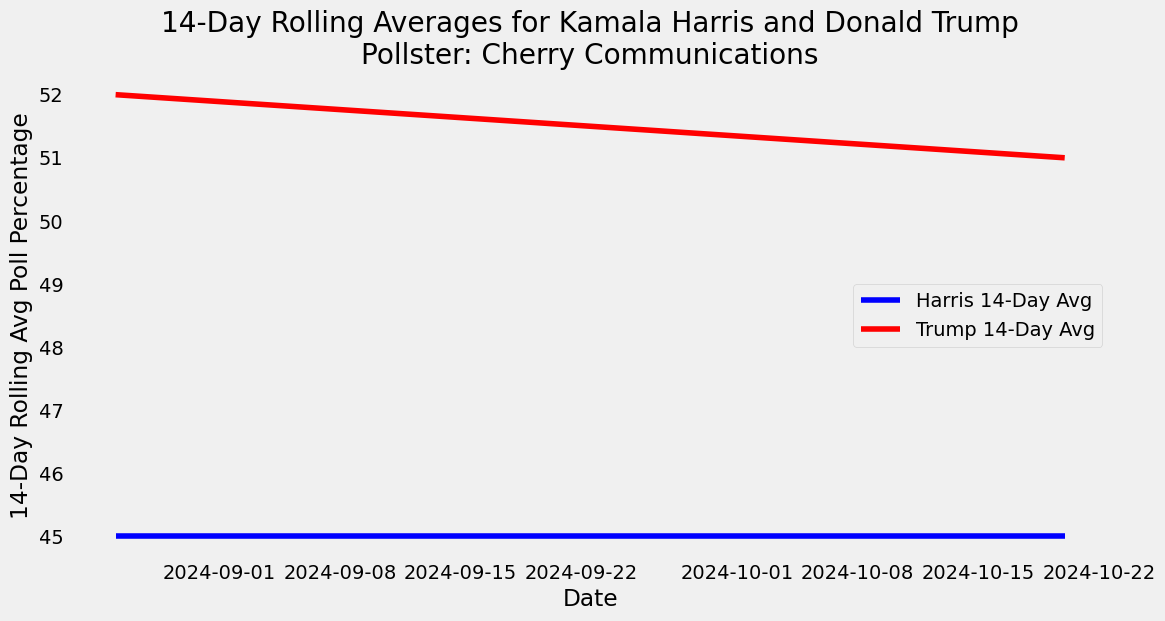

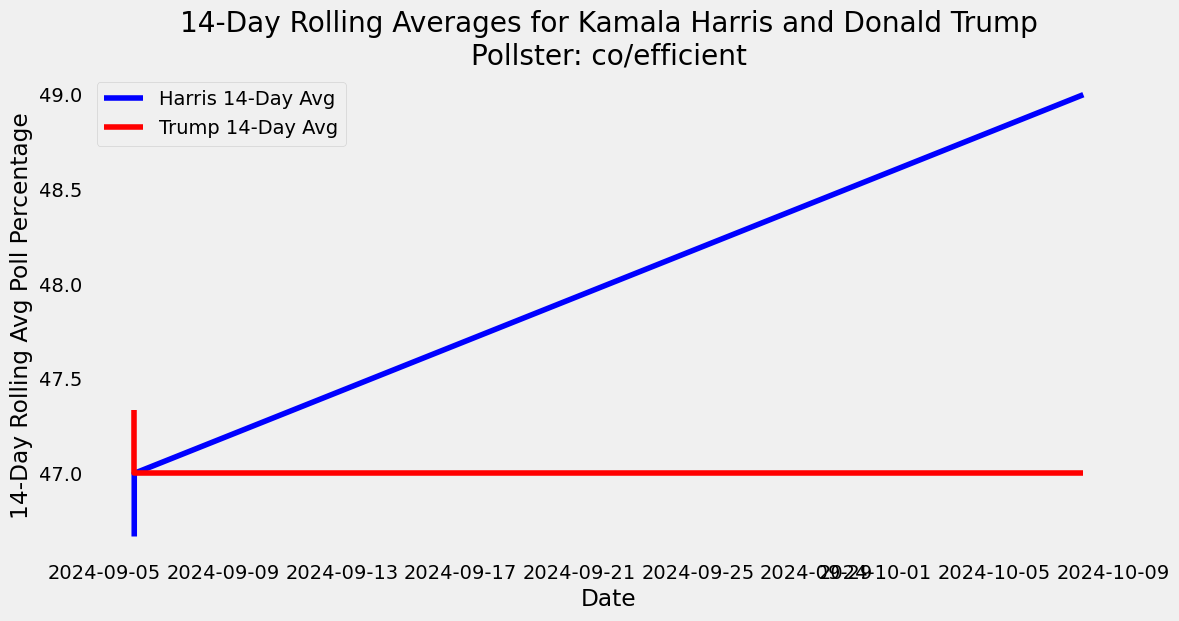

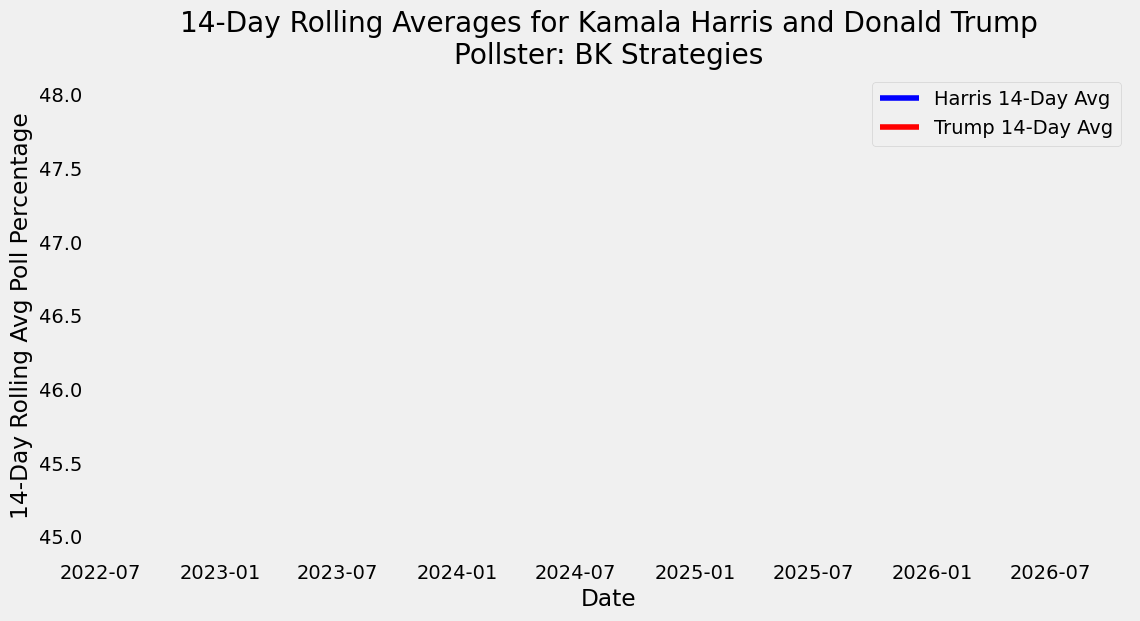

No data for pollster: Battleground Connect


In [402]:
top_pollsters = ['Atlantic Media and Research', 'U. New Orleans', 'Basswood Research', 'DHM Research', 
                 'Victory Research', 'Wick', 'Frederick Polls LLC', 'Fabrizio', 'PPIC', 
                 'Crosswind Media & Public Relations']

#I increased the list to include 20 pollsters because the previous one didnt have enough data
selected_pollsters = [
    'Atlantic Media and Research', 'U. New Orleans', 'Basswood Research', 'DHM Research', 'Victory Research', 
    'Wick', 'Frederick Polls LLC', 'Fabrizio', 'PPIC', 'Crosswind Media & Public Relations', 'Zia Poll', 
    'Florida Atlantic University', 'Research & Polling', 'Cardinal Point Analytics (CardinalGPS)', 
    'Tarrance', 'Texas Lyceum', 'Cherry Communications', 'co/efficient', 'BK Strategies', 'Battleground Connect'
]

#code for isolating trump and harris dfs - like before
harris_df = df1[(df1['candidate_name'] == 'Kamala Harris') & (df1['pollster'].isin(selected_pollsters))]
trump_df = df1[(df1['candidate_name'] == 'Donald Trump') & (df1['pollster'].isin(selected_pollsters))]

#loop to plot the multiple pollsters
for pollster in selected_pollsters:
    hdf_pollster = harris_df[harris_df['pollster'] == pollster][['end_date', 'pct']].set_index('end_date')
    tdf_pollster = trump_df[trump_df['pollster'] == pollster][['end_date', 'pct']].set_index('end_date')
    
    #I tried this and got alot of empty data for pollsters so im adding a condition to make it run the code if its
    #not empty
    if not hdf_pollster.empty and not tdf_pollster.empty:
        
        #rolling avg calculation
        hdf_pollster['Harris_14d_avg'] = hdf_pollster['pct'].rolling('14D', min_periods=1).mean()
        tdf_pollster['Trump_14d_avg'] = tdf_pollster['pct'].rolling('14D', min_periods=1).mean()

        #plotting for the pollsters
        plt.figure(figsize=(12, 6))
        plt.plot(hdf_pollster.index, hdf_pollster['Harris_14d_avg'], color='blue', label='Harris 14-Day Avg')
        plt.plot(tdf_pollster.index, tdf_pollster['Trump_14d_avg'], color='red', label='Trump 14-Day Avg')
        plt.xlabel('Date')
        plt.ylabel('14-Day Rolling Avg Poll Percentage')
        plt.title(f'14-Day Rolling Averages for Kamala Harris and Donald Trump\nPollster: {pollster}')
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print(f"No data for pollster: {pollster}")


#### Smallest Forecast Error without using Absolute Values

No data for pollster: Goucher College


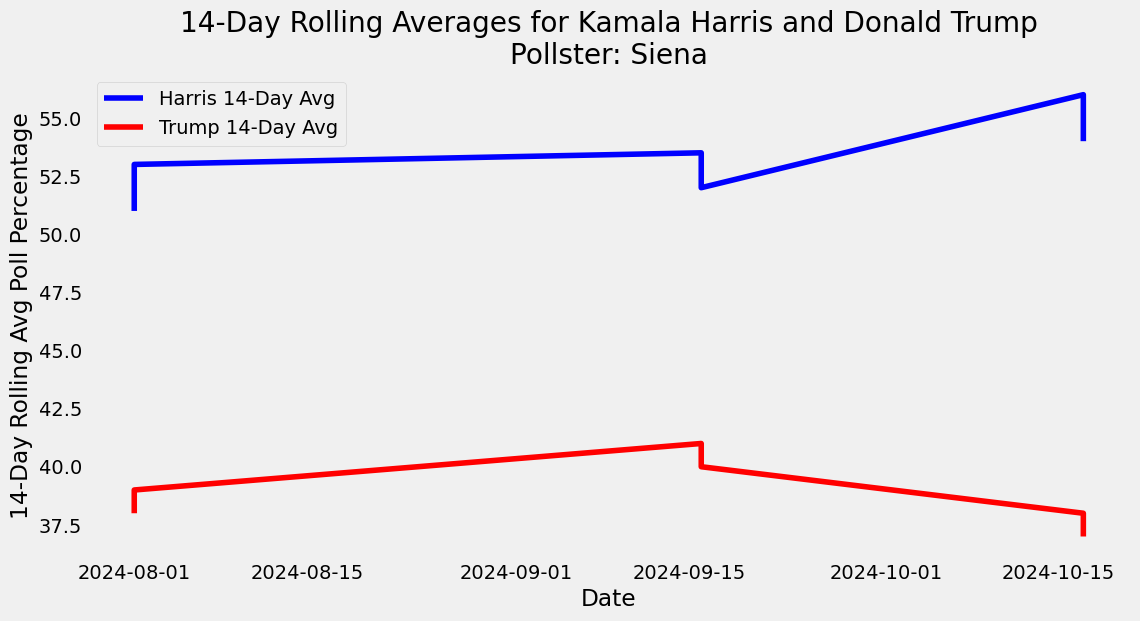

No data for pollster: Opinion Works


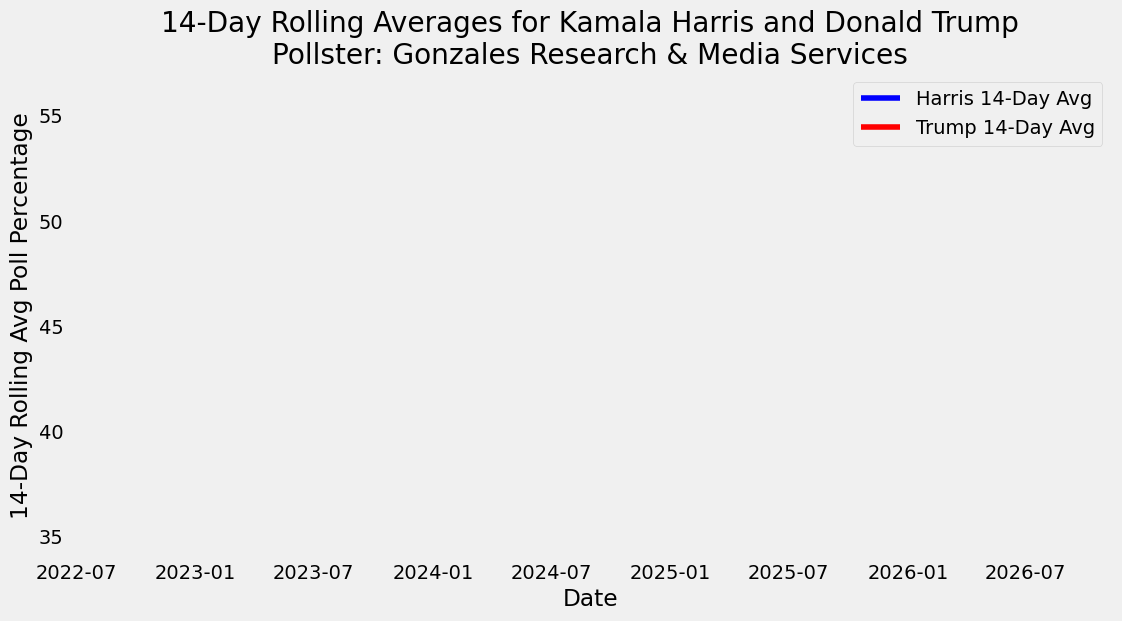

No data for pollster: U. of Arkansas


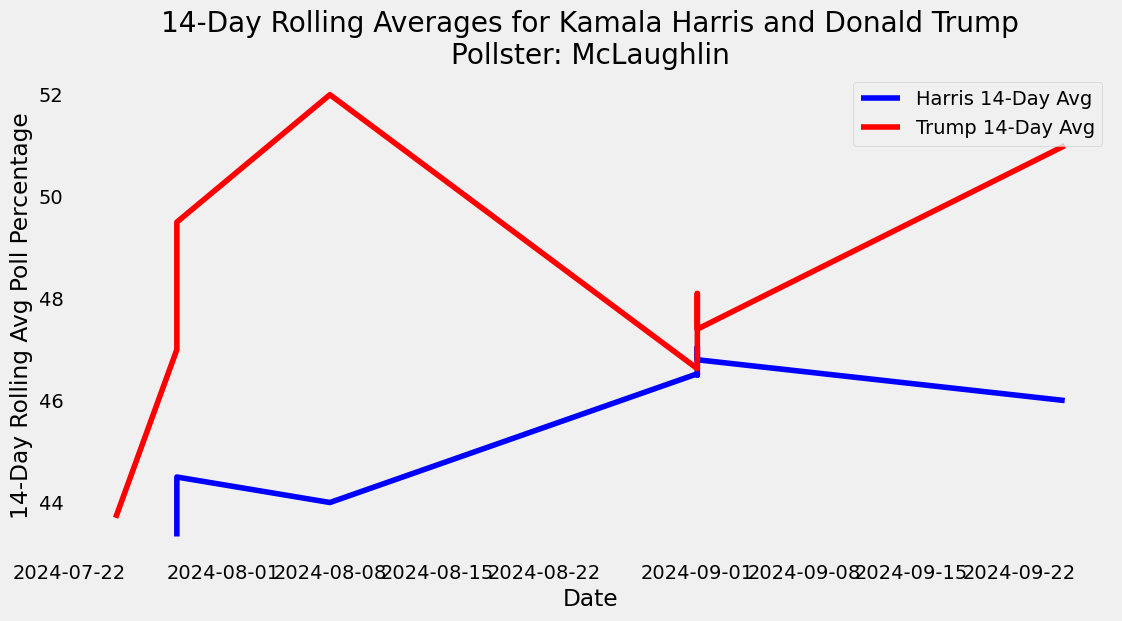

No data for pollster: Braun
No data for pollster: Zia Poll


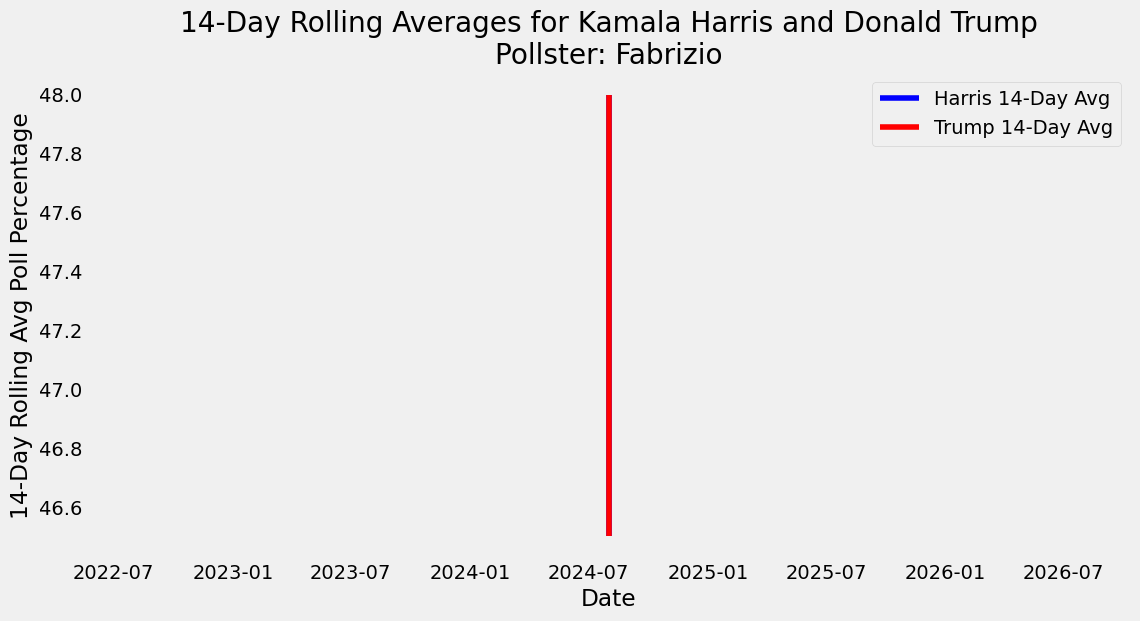

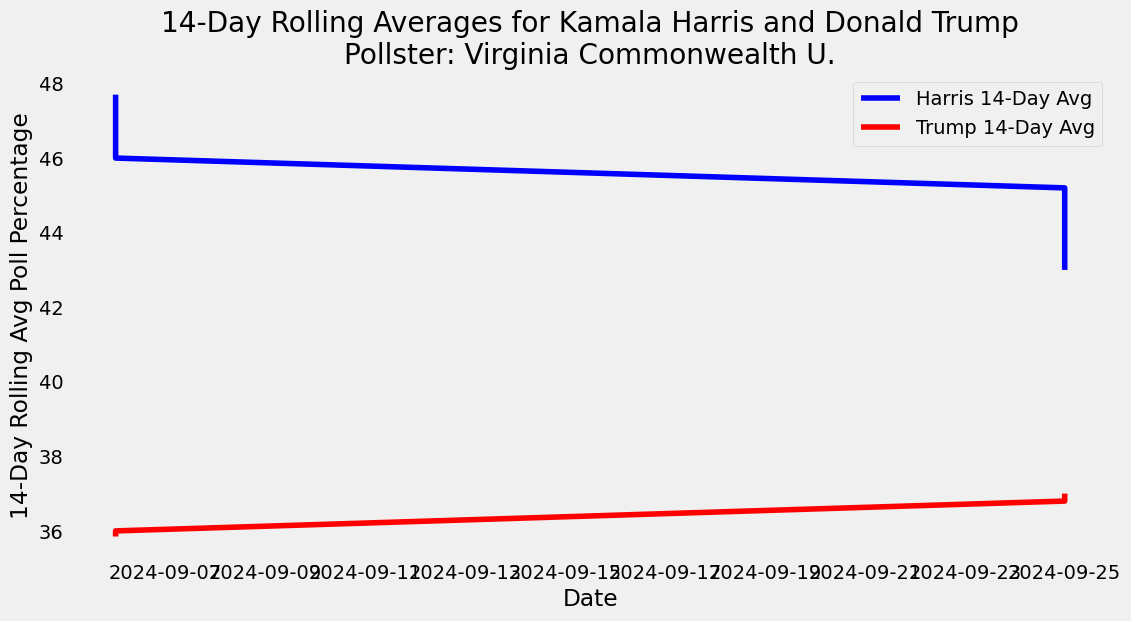

In [397]:
#got this list from finding the mean without the absolute values to see if it makes a difference in the data
selected_pollsters = [
    'Goucher College', 
    'Siena', 
    'Opinion Works', 
    'Gonzales Research & Media Services', 
    'U. of Arkansas', 
    'McLaughlin', 
    'Braun', 
    'Zia Poll', 
    'Fabrizio', 
    'Virginia Commonwealth U.'
]

harris_df = df1[(df1['candidate_name'] == 'Kamala Harris') & (df1['pollster'].isin(selected_pollsters))]
trump_df = df1[(df1['candidate_name'] == 'Donald Trump') & (df1['pollster'].isin(selected_pollsters))]

for pollster in selected_pollsters:
    hdf_pollster = harris_df[harris_df['pollster'] == pollster][['end_date', 'pct']].set_index('end_date')
    tdf_pollster = trump_df[trump_df['pollster'] == pollster][['end_date', 'pct']].set_index('end_date')

    if not hdf_pollster.empty and not tdf_pollster.empty:
        
        hdf_pollster['Harris_14d_avg'] = hdf_pollster['pct'].rolling('14D', min_periods=1).mean()
        tdf_pollster['Trump_14d_avg'] = tdf_pollster['pct'].rolling('14D', min_periods=1).mean()

        plt.figure(figsize=(12, 6))
        plt.plot(hdf_pollster.index, hdf_pollster['Harris_14d_avg'], color='blue', label='Harris 14-Day Avg')
        plt.plot(tdf_pollster.index, tdf_pollster['Trump_14d_avg'], color='red', label='Trump 14-Day Avg')
        
        plt.xlabel('Date')
        plt.ylabel('14-Day Rolling Avg Poll Percentage')
        plt.title(f'14-Day Rolling Averages for Kamala Harris and Donald Trump\nPollster: {pollster}')
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print(f"No data for pollster: {pollster}")


#### Smallest Forecast Errors without finding Mean

In [403]:
merged_df['abs_forecast_error'] = merged_df['forecast_error'].abs()

#abs min forecast errors
pollster_performance = merged_df.groupby('pollster')['abs_forecast_error'].min()

#sorting and getting the top smallest
top_10_pollsters = pollster_performance.nsmallest(10)

print("Top 10 Pollsters with Lowest Raw Forecast Errors:\n")
print(top_10_pollsters)

Top 10 Pollsters with Lowest Raw Forecast Errors:

pollster
SurveyMonkey                   1.866e-05
Florida Atlantic University    9.247e-05
Trafalgar Group                9.951e-05
AtlasIntel                     1.454e-04
Selzer                         1.488e-04
InsiderAdvantage               1.890e-04
Siena/NYT                      3.005e-04
Øptimus                        3.959e-04
Mason-Dixon                    5.621e-04
Marquette Law School           6.146e-04
Name: abs_forecast_error, dtype: float64


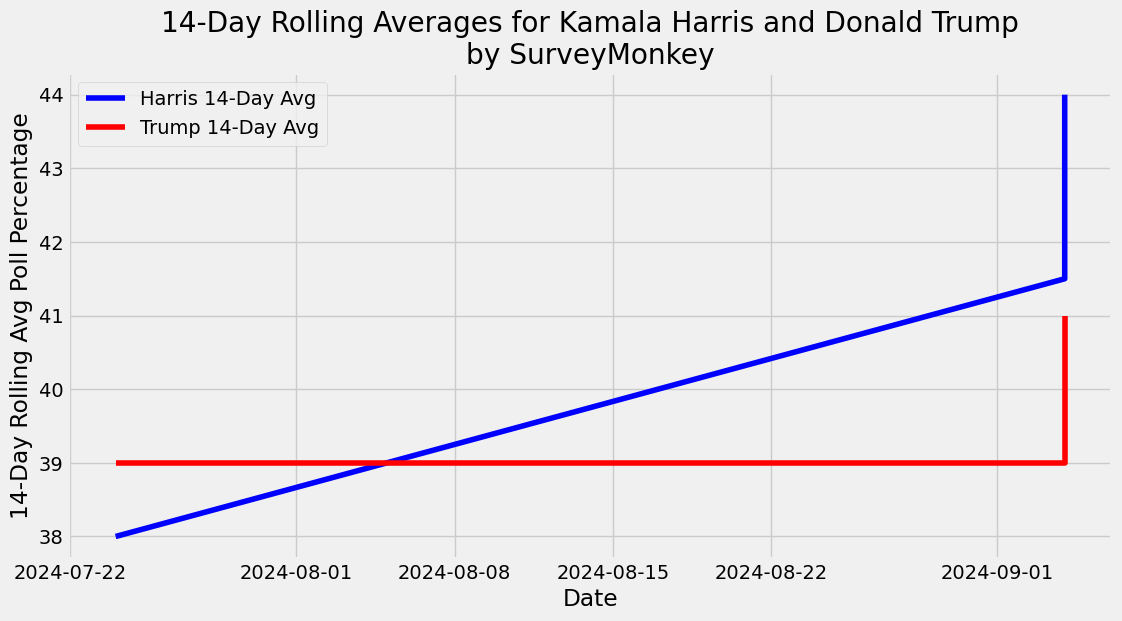

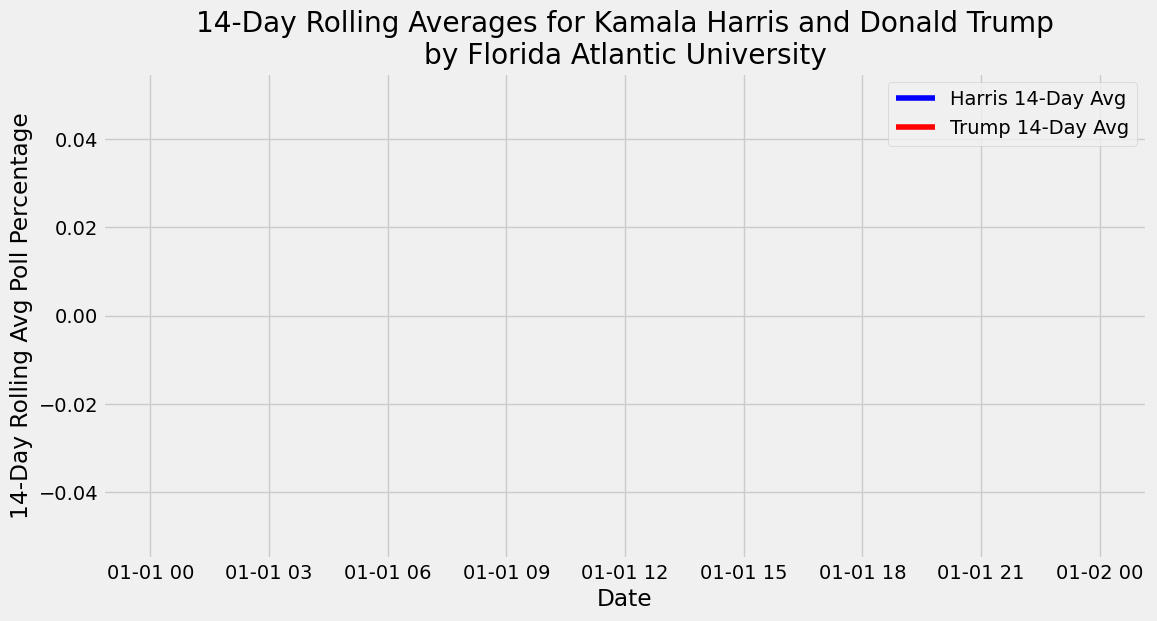

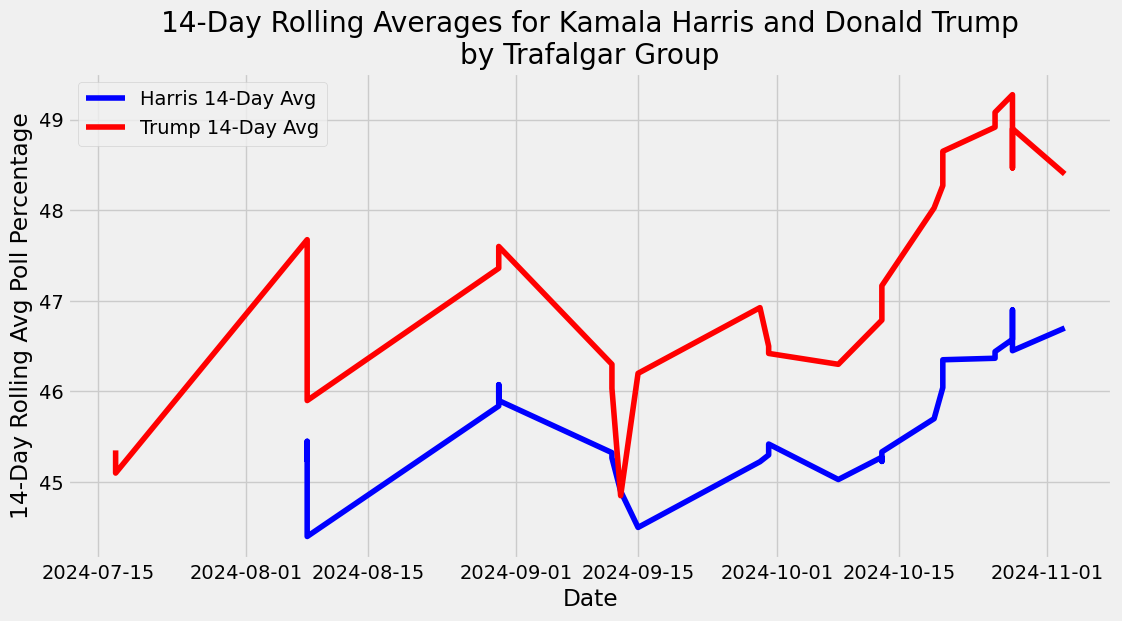

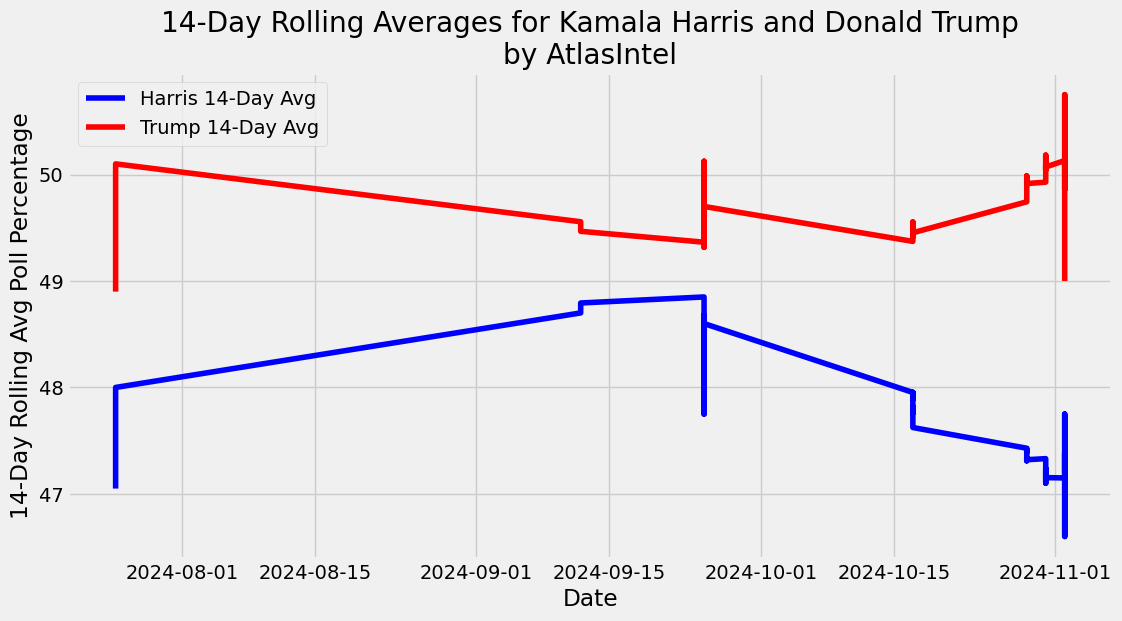

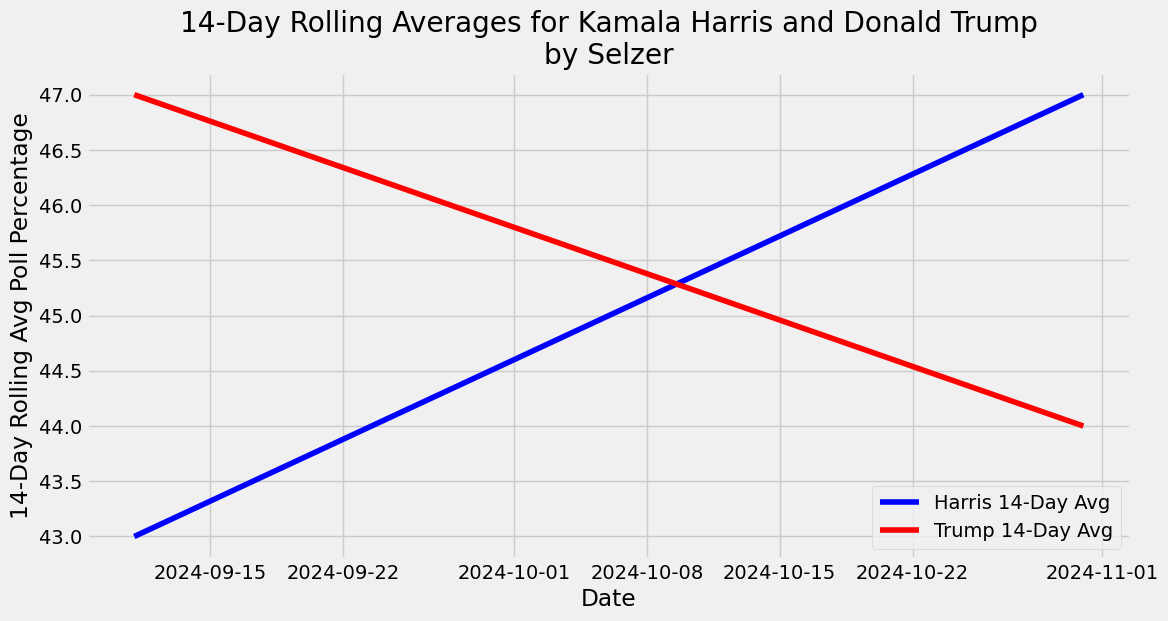

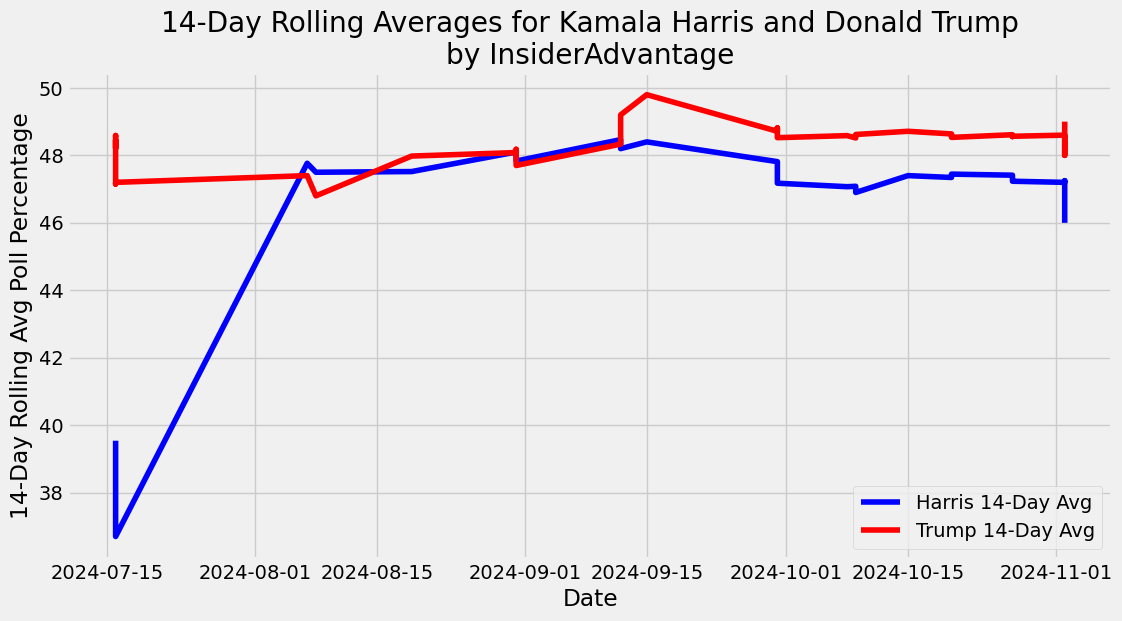

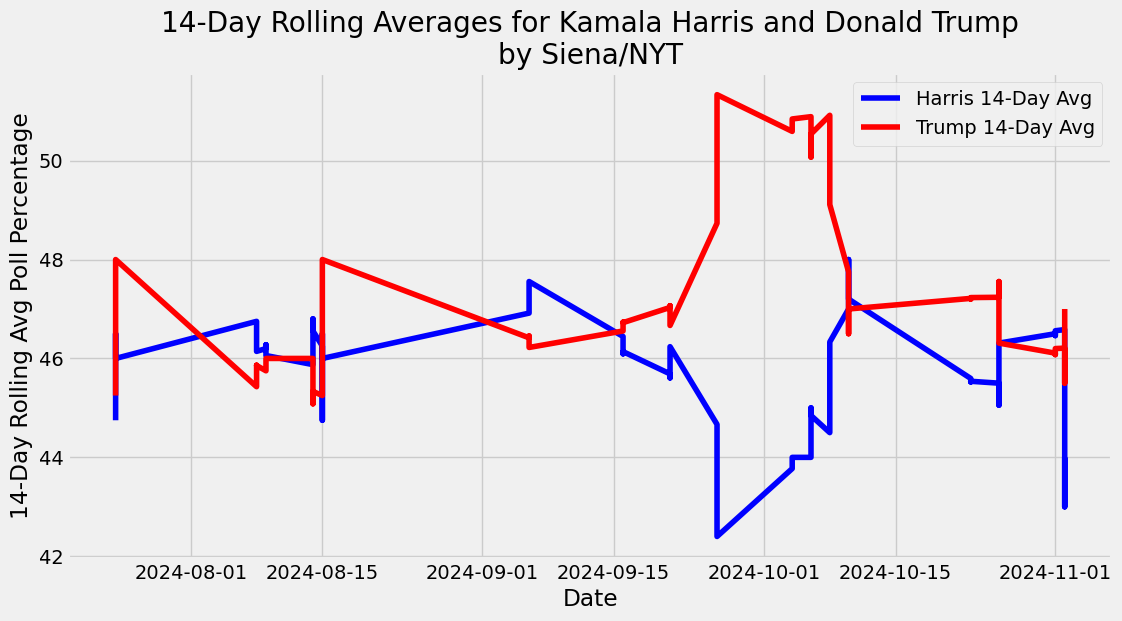

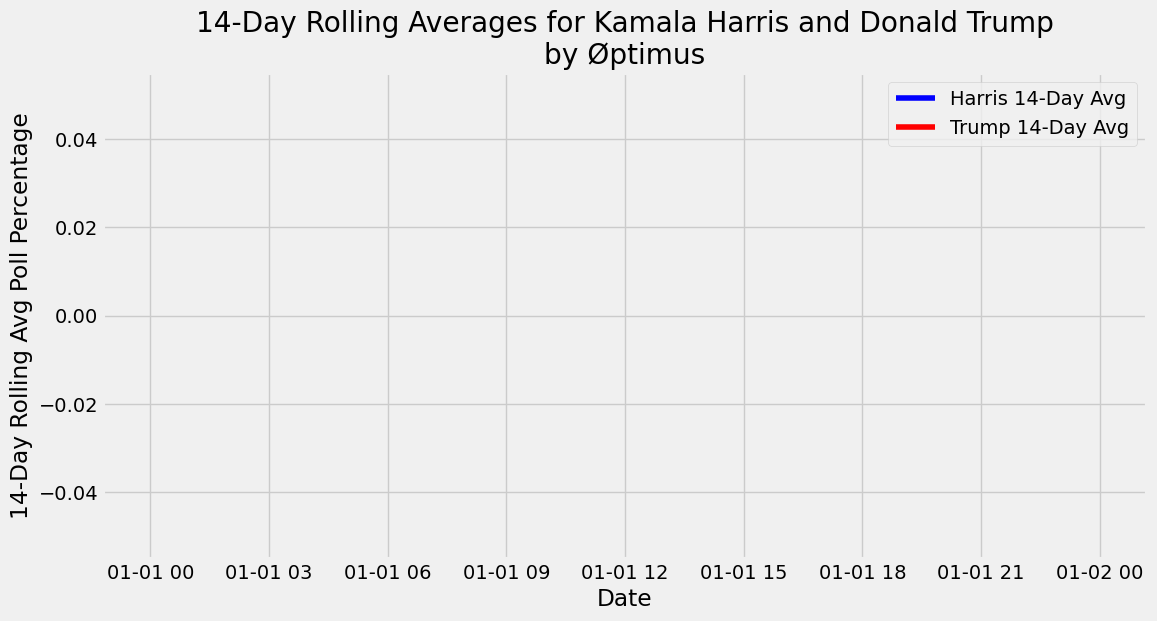

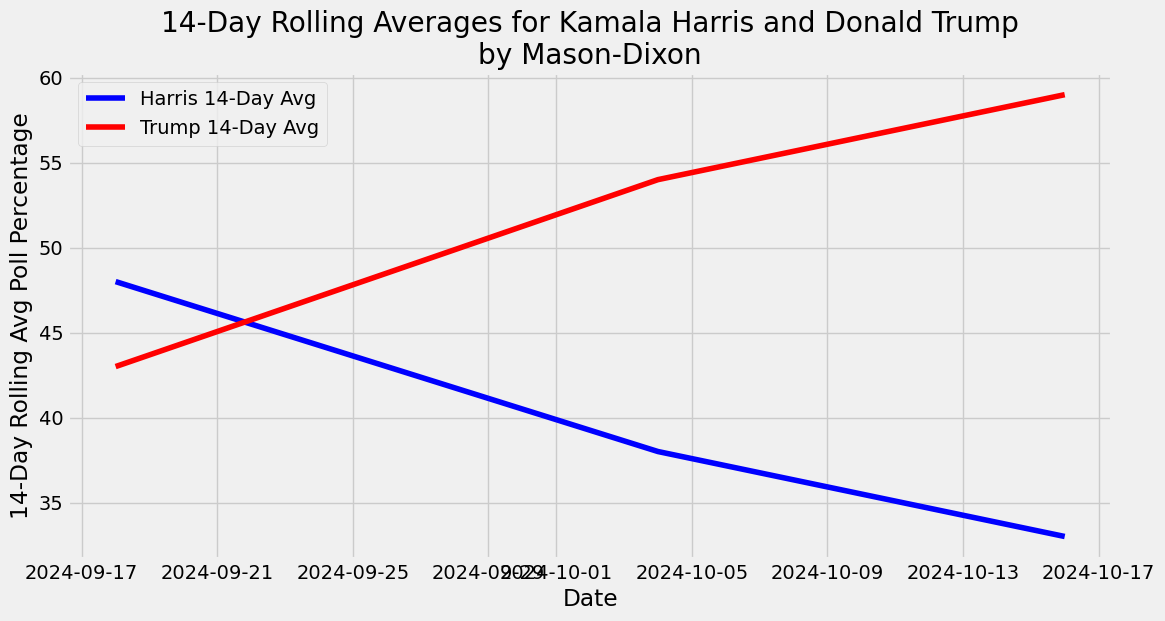

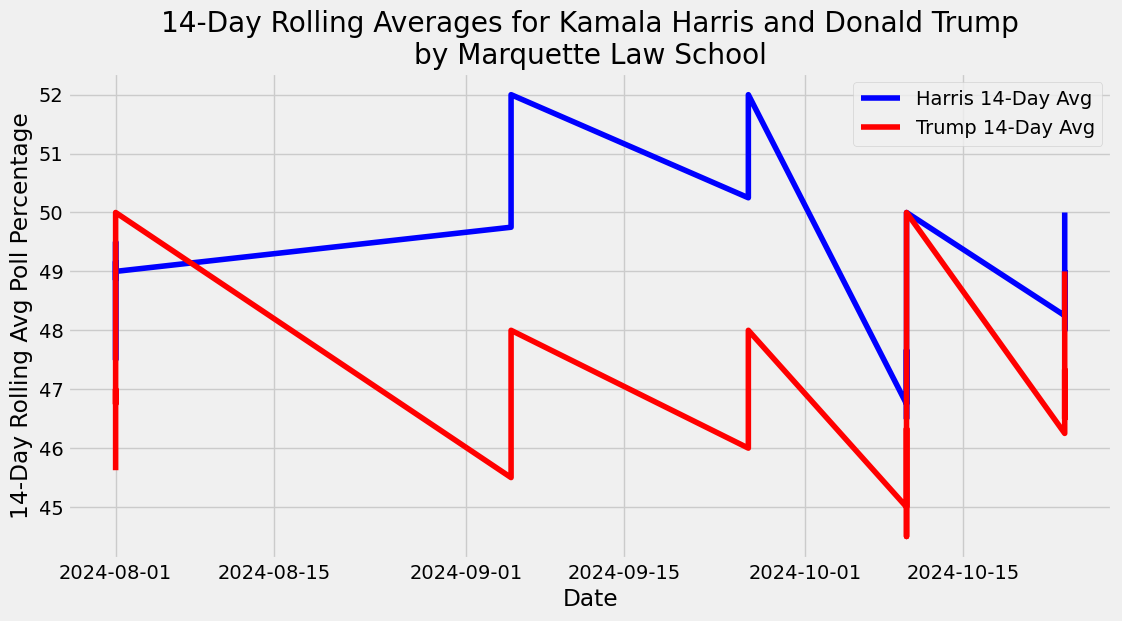

In [406]:
pollsters_list = [
    'SurveyMonkey',
    'Florida Atlantic University',
    'Trafalgar Group',
    'AtlasIntel',
    'Selzer',
    'InsiderAdvantage',
    'Siena/NYT',
    'Øptimus',
    'Mason-Dixon',
    'Marquette Law School'
]

harris_df = df1[(df1['candidate_name'] == 'Kamala Harris') & (df1['pollster'].isin(pollsters_list))]
trump_df = df1[(df1['candidate_name'] == 'Donald Trump') & (df1['pollster'].isin(pollsters_list))]

for pollster in pollsters_list:
    
    hdf_pollster = harris_df[harris_df['pollster'] == pollster][['end_date', 'pct']].set_index('end_date')
    tdf_pollster = trump_df[trump_df['pollster'] == pollster][['end_date', 'pct']].set_index('end_date')
    
    hdf_pollster['Harris_14d_avg'] = hdf_pollster['pct'].rolling('14D', min_periods=1).mean()
    tdf_pollster['Trump_14d_avg'] = tdf_pollster['pct'].rolling('14D', min_periods=1).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(hdf_pollster.index, hdf_pollster['Harris_14d_avg'], color='blue', label='Harris 14-Day Avg')
    plt.plot(tdf_pollster.index, tdf_pollster['Trump_14d_avg'], color='red', label='Trump 14-Day Avg')

    plt.xlabel('Date')
    plt.ylabel('14-Day Rolling Avg Poll Percentage')
    plt.title(f'14-Day Rolling Averages for Kamala Harris and Donald Trump\nby {pollster}')
    plt.legend()

    plt.show()


### Differences in Data recorded from Top 10 Pollsters

There was a significant difference in the pollsters that did well in 2020 compared to those same pollsters for the current 2024 election. I collected a large sample of these pollsters and graphed them out, the common theme uniting them is that there was a lack of data for many of them and the graphs were very unsmooth. Many of them by the looks of it are a terrible representation for the current election. The best one based on the data presented so far has been Trafalgar group which resembles a decent representation of what the election 14 day rolling averages look like.

### On the Assumption that Pollsters that did Well in 2020 will do Well in 2024

It is "naive" because at the end of the day they are two completely different elections focused on different candidates and different issues. There are a number of reasons to think that the pollsters of the previous election might not be as effective for the current one. For one, polling methadologies may have changed leading to perhaps negative or subpar results and what may have worked during the 2020 election might not have worked in the current 2024 election. Furthermore, there could be possible changes in polling samples due to voter demographics and voter turnout. All very important factors that contribute to the overall success of a pollster during an election. 